In [2]:
import pandas as pd
from fuzzywuzzy import fuzz
import numpy as np

c:\Users\chacon1\AppData\Local\Programs\Python\Python39\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
# list of the states we are looking at/interested in
states = ['IA', 'OK', 'MO', 'OK', 'AL', 'LA', 'MS', 'IL', 'IN', 'OH', 'KY', 'TN', 'AR', 'NC', 'SC', 'GA']

### 0191 - General Farms, Primarily Cropm

In [4]:
FILEPATH = "../data/code_0191.csv"
df = pd.read_csv(FILEPATH)

In [5]:
df.head()

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,...,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,0,OLD RIVER FARM,50 MILLER RD,MIDDLEFIELD,CT,6455,1229.0,7.0,860,2,...,4,580100,4,41.500023,-72.699730,P,25540,2.0,278,9007
1,1,FELIX CHAC CHUO FARMS INC,89785 80TH AVE,THERMAL,CA,92274,8906.0,65.0,760,2,...,6,45605,5,33.468129,-116.098759,P,40140,2.0,348,6065
2,2,C & N PETERSON FARMS INC,30310 455TH AVE,WAKONDA,SD,57073,6300.0,27.0,605,2,...,2,965800,3,42.992997,-97.096458,P,46820,1.0,0,46027
3,3,E-I-E-I-O FARM LLC,1003 NEWFIELD ST,MIDDLETOWN,CT,6457,1817.0,7.0,860,2,...,7,541200,3,41.586472,-72.674690,P,25540,2.0,278,9007
4,4,DRAGO INDIANA,6147 N COUNTY ROAD 500 W,MULBERRY,IN,46058,9445.0,23.0,765,2,...,3,950300,3,40.377054,-86.596185,P,23140,1.0,320,18023


In [6]:
# trim out irrelevant states
df = df[df['STATE'].isin(states)]
df['STATE'].unique()

array(['IN', 'SC', 'IL', 'OH', 'MO', 'OK', 'NC', 'LA', 'AR', 'MS', 'TN',
       'GA', 'IA', 'AL', 'KY'], dtype=object)

<Axes: title={'center': 'Number of Businesses (SIC Code 0191) by State'}, xlabel='STATE', ylabel='Count'>

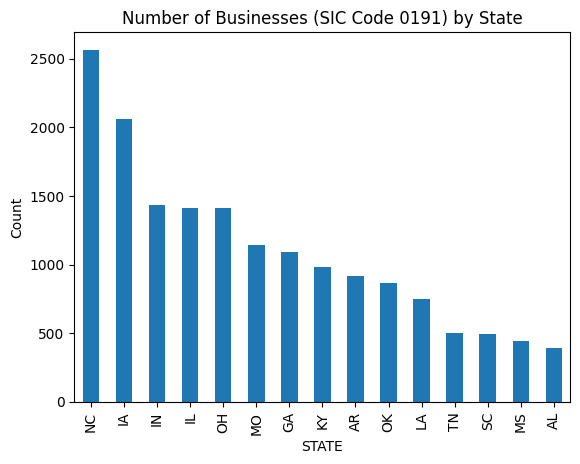

In [8]:
df['STATE'].value_counts().plot(kind='bar', ylabel="Count", title="Number of Businesses (SIC Code 0191) by State")

In [9]:
df['SIC6_DESCRIPTIONS'].value_counts()

SIC6_DESCRIPTIONS
FARMS                                    14285
GENERAL FARMS-PRIMARILY CROP               780
APPLIANCES-HOUSEHOLD-MAJOR-REPAIRING        71
ORGANIC FARMS                               50
TRUCKING                                    43
                                         ...  
CHEMICALS-RETAIL                             1
CUT STONE & STONE PRODUCTS (MFRS)            1
FEED MILL EQUIPMENT & SUPPLIES (MFRS)        1
PAINT-RETAIL                                 1
CORRECTIONAL INSTITUTIONS-PRIVATE            1
Name: count, Length: 366, dtype: int64

In [10]:
# filter out SIC6_DESCRIPTIONS that are irrelvant 

# new dataframe that will contains the filtered set
df_filter = pd.DataFrame(columns=df.columns)

# remove anything containing a label that only appears less than x amount of times
x = 15
temp_series = df["SIC6_DESCRIPTIONS"].value_counts()[df["SIC6_DESCRIPTIONS"].value_counts() < x]

# extract the labels from the series created above, these are the labels that we will be removing
# put them into a list
temp_labels = temp_series.index
temp_label_list = temp_labels.tolist()

# after printing the output at the end, I came back and added label manually taht I wanted to remove
temp_label_list += ['APPLIANCES-HOUSEHOLD-MAJOR-REPAIRING', 'ORGANIC FARMS', 'TRUCKING', 'MARIJUANA GROWERS/CULTIVATORS',
                    'FARM SUPPLIES (WHLS)', 'STABLES', 'CORN', 'REAL ESTATE', 'AGRICULTURAL PRODUCTS', 'FARM EQUIPMENT (WHLS)']    
   
labels_to_keep = ['POULTRY PROCESSING PLANTS (MFRS)', 'POULTRY FARMS']

# create new dataframe df_filter that does NOT contain the above undesired labels
for i in range(len(df)):
    if df.iloc[i]["SIC6_DESCRIPTIONS"] in labels_to_keep:
        df_filter.loc[len(df_filter.index)] = df.iloc[i] # adding it to the new DataFrame
    else:
        continue

In [11]:
df_filter['SIC6_DESCRIPTIONS'].value_counts()

SIC6_DESCRIPTIONS
POULTRY PROCESSING PLANTS (MFRS)    37
POULTRY FARMS                       25
Name: count, dtype: int64

<Axes: title={'center': 'Number of SIC Code 0191 by State'}, xlabel='STATE', ylabel='Count'>

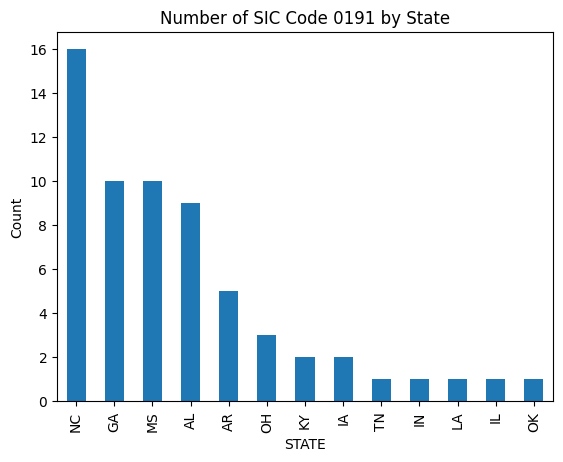

In [12]:
df_filter['STATE'].value_counts().plot(kind='bar', ylabel="Count", title="Number of SIC Code 0191 by State")

### 0241 - Dairy Farms sits in Division A - Agriculture, Forestry, Fishing and Hunting

In [13]:
FILEPATH = "../data/code_0241.csv"
df = pd.read_csv(FILEPATH)

In [14]:
df.head()

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,...,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,0,MOSSING'S DAIRY LLC,47447 233A ST,EGAN,SD,57024,6439.0,101,605,2,...,2,959600,2,43.998130,-96.721610,P,0,NaN,0,46101
1,1,LONG DAIRY FARM INC,27164 477TH AVE,HARRISBURG,SD,57032,8210.0,83,605,2,...,5,10107,3,43.450902,-96.667723,P,43620,2.0,0,46083
2,2,CYPHER DAIRY CONSULTING LLC,26443 461ST AVE,HARTFORD,SD,57033,6703.0,99,605,2,...,4,10300,2,43.551800,-96.992924,P,43620,2.0,0,46099
3,3,UNITED DAIRY INC,6 GARVIN DAIRY RD,FAIRMONT,WV,26554,5058.0,49,304,2,...,7,21000,2,39.481453,-80.082759,P,21900,1.0,390,54049
4,4,DAIRYNET INC,2301 RESEARCH PARK WAY # 155,BROOKINGS,SD,57006,1724.0,11,605,2,...,7,958900,5,44.320347,-96.764656,P,15100,1.0,0,46011


In [15]:
# filter out SIC6_DESCRIPTIONS that are irrelvant 

# new dataframe that will contains the filtered set
df_filter = pd.DataFrame(columns=df.columns)

# remove anything containing a label that only appears less than x amount of times
x = 15
temp_series = df["SIC6_DESCRIPTIONS"].value_counts()[df["SIC6_DESCRIPTIONS"].value_counts() < x]

# extract the labels from the series created above, these are the labels that we will be removing
# put them into a list
temp_labels = temp_series.index
temp_label_list = temp_labels.tolist()

# after printing the output at the end, I came back and added label manually taht I wanted to remove
temp_label_list += ['DAIRIES (MILK)', 'FLUID MILK (MFRS)', 'RESTAURANTS', 'ICE CREAM PARLORS', 'GROCERS-RETAIL',
                    'CONVENIENCE STORES', 'ICE CREAM & FROZEN DESSERTS (MFRS)', 'DAIRY CONSULTANTS',
                    'CHEESE PROCESSORS (MFRS)', 'CHEESE', 'DAIRY EQUIPMENT & SUPPLIES (WHLS)']    
   

# create new dataframe df_filter that does NOT contain the above undesired labels
for i in range(len(df)):
    if df.iloc[i]["SIC6_DESCRIPTIONS"] in temp_label_list:
        continue
    else:
        df_filter.loc[len(df_filter.index)] = df.iloc[i] # adding it to the new DataFrame

In [16]:
df_filter["SIC6_DESCRIPTIONS"].value_counts()

SIC6_DESCRIPTIONS
DAIRY FARMS                     1478
FARMS                            138
DAIRY PRODUCTS-RETAIL             95
DAIRY PRODUCTS-WHOLESALE          88
GENERAL FARMS-PRIMARILY CROP      23
Name: count, dtype: int64

### 0251 - Broiler, Fryer, and Roaster Chickens

In [17]:
FILEPATH = "../data/code_0251.csv"
df = pd.read_csv(FILEPATH)

In [18]:
df.head()

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,...,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,53368,SANDERSON FARMS,2535 SANDERSON DR,LAUREL,MS,39440,4741.0,67,601,2,...,7,950600,3,31.667854,-89.163265,0,29860,1.0,279,28067
1,81980,CONERLY POULTRY,12 MCCRAY RD,JAYESS,MS,39641,8053.0,147,601,2,...,4,950100,2,31.304582,-90.159784,P,0,NaN,0,28147
2,110002,TRIPLE P RANCH & EQUIPMENT LLC,22211 FIVE BRIDGES AVE,COLE CAMP,MO,65325,2303.0,15,660,2,...,4,460100,1,38.360331,-93.211563,P,0,NaN,0,29015
3,51821,THREE WAY LIVE POULTRY,3071 WEBSTER AVE,BRONX,NY,10467,4900.0,5,718,2,...,8,42500,1,40.870614,-73.878419,P,35620,2.0,408,36005
4,42882,GOLDEN-ROD BROILER INC,2352 COUNTY ROAD 719,CULLMAN,AL,35055,9655.0,43,256,2,...,6,964900,6,34.154194,-86.768567,0,18980,1.0,142,1043


In [19]:
# trim out irrelevant states
df = df[df['STATE'].isin(states)]
df['STATE'].unique()

array(['MS', 'MO', 'AL', 'IL', 'IN', 'SC', 'AR', 'NC', 'GA'], dtype=object)

<Axes: title={'center': 'Number of Businesses (SIC Code 0251,) by State'}, xlabel='STATE', ylabel='Count'>

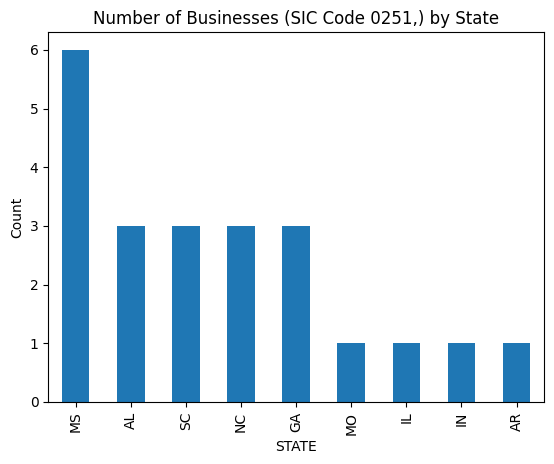

In [21]:
df['STATE'].value_counts().plot(kind='bar', ylabel="Count", title="Number of Businesses (SIC Code 0251,) by State")

In [22]:
df['SIC6_DESCRIPTIONS'].value_counts()

SIC6_DESCRIPTIONS
BROILER FRYER & ROASTER CHICKENS    11
POULTRY PROCESSING PLANTS (MFRS)     4
POULTRY-WHOLESALE                    2
FARMS                                2
FEED-MANUFACTURERS                   1
BEEF CATTLE-EXCEPT FEEDLOTS          1
CHICKEN EGGS                         1
Name: count, dtype: int64

### 254 - General Farms, Primarily Crop

In [23]:
FILEPATH = "../data/code_254.csv"
df = pd.read_csv(FILEPATH)

In [24]:
df.head()

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,...,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,3129,ACTION BEHAVIOR CTR-ABA THRPY,320 E 1ST AVE # 101,BROOMFIELD,CO,80020,3786.0,14,720,2,...,7,30300,2,39.915481,-105.065944,P,19740,2.0,216,8014
1,5326,HASSELBACH MEATS,4637 OAK HARBOR RD,FREMONT,OH,43420,9373.0,143,419,2,...,7,960900,2,41.441192,-83.134802,P,23380,1.0,534,39143
2,6850,MURRAY CABINETRY LUXURY & BATH,407 N BLOOMINGTON ST,STREATOR,IL,61364,2201.0,99,815,2,...,7,963900,4,41.125039,-88.835096,P,36837,1.0,176,17099
3,11380,COOTERS FARM,1784 TUCK WILKES RD,NOXAPATER,MS,39346,9311.0,159,662,2,...,3,950200,4,33.011665,-89.126923,P,0,NaN,0,28159
4,11845,MCM POULTRY,711 W FOURTH ST,BEAUMONT,CA,92223,NaN,65,951,2,...,7,43807,2,33.947900,-116.977100,X,40140,2.0,348,6065


In [25]:
# trim out irrelevant states
df = df[df['STATE'].isin(states)]
df['STATE'].unique()

array(['OH', 'IL', 'MS', 'IN', 'SC', 'NC', 'TN', 'MO', 'GA', 'OK', 'LA',
       'AL', 'IA', 'KY', 'AR'], dtype=object)

<Axes: title={'center': 'Number of Businesses (SIC Code 254) by State'}, xlabel='STATE', ylabel='Count'>

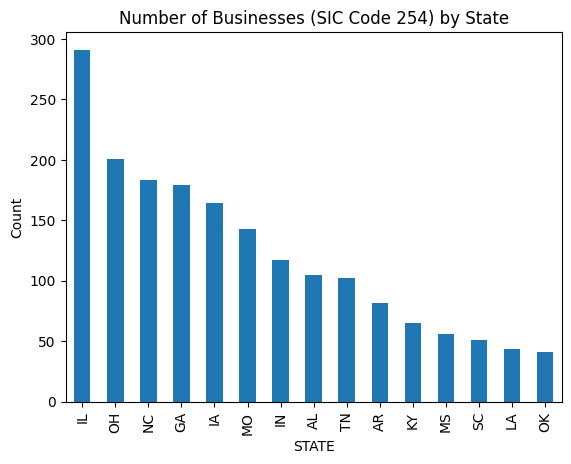

In [26]:
df['STATE'].value_counts().plot(kind='bar', ylabel="Count", title="Number of Businesses (SIC Code 254) by State")

In [27]:
df['SIC6_DESCRIPTIONS'].value_counts()

SIC6_DESCRIPTIONS
POULTRY FARMS                              403
CHILD CARE SERVICE                         129
POULTRY PROCESSING PLANTS (MFRS)            87
FAMILY & CHILDREN SERVICES                  71
CLINICS                                     71
                                          ... 
GAMES TOYS & CHILDREN'S VEHICLES (MFRS)      1
MODEL MAKERS (MFRS)                          1
TOILET PARTITIONS                            1
EMPLOYEES SUGGESTION SYSTEM                  1
RESTAURANT EQUIPMENT & SUPPLIES-MFRS         1
Name: count, Length: 315, dtype: int64

In [28]:
# filter out SIC6_DESCRIPTIONS that are irrelvant 

# new dataframe that will contains the filtered set
df_filter = pd.DataFrame(columns=df.columns)

# remove anything containing a label that only appears less than x amount of times
x = 28
temp_series = df["SIC6_DESCRIPTIONS"].value_counts()[df["SIC6_DESCRIPTIONS"].value_counts() < x]

# extract the labels from the series created above, these are the labels that we will be removing
# put them into a list
temp_labels = temp_series.index
temp_label_list = temp_labels.tolist()

# after printing the output at the end, I came back and added label manually taht I wanted to remove
temp_label_list += ['CHILD CARE SERVICE', 'FAMILY & CHILDREN SERVICES', 'CLINICS', 'COUNTER TOPS-MANUFACTURERS', 'CABINETS-MANUFACTURERS',
                    'DISPLAY FIXTURES & MATERIALS-MFRS', 'STORE FIXTURES-MANUFACTURERS', 'OFFICE & STORE FIXTURES-WOOD (MFRS)',
                    'SHELVING-MANUFACTURERS']    
   

# create new dataframe df_filter that does NOT contain the above undesired labels
for i in range(len(df)):
    if df.iloc[i]["SIC6_DESCRIPTIONS"] in temp_label_list:
        continue
    else:
        df_filter.loc[len(df_filter.index)] = df.iloc[i] # adding it to the new DataFrame

In [29]:
df_filter['SIC6_DESCRIPTIONS'].value_counts()

SIC6_DESCRIPTIONS
POULTRY FARMS                       403
POULTRY PROCESSING PLANTS (MFRS)     87
FARMS                                28
Name: count, dtype: int64

<Axes: title={'center': 'Number of Businesses (SIC Code 254) by State'}, xlabel='STATE', ylabel='Count'>

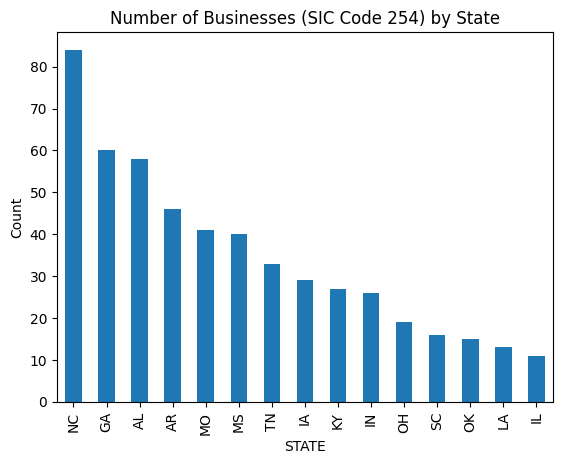

In [31]:
df_filter['STATE'].value_counts().plot(kind='bar', ylabel="Count", title="Number of Businesses (SIC Code 254) by State")

### 0291 - General Farms, Primarily Livestock and Animal Specialties

In [32]:
FILEPATH = "../data/code_0291.csv"
df = pd.read_csv(FILEPATH)

In [33]:
df.head()

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,...,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,0,CHURCH RANCH,20009 HIGHWAY 72,ARVADA,CO,80007,8236.0,59,303,2,...,5,60500.0,3.0,39.869196,-105.230716,P,19740,2.0,216,8059
1,1,SAN PABLITO RANCH,7660 WOODWAY DR,HOUSTON,TX,77063,1533.0,201,713,2,...,7,430300.0,1.0,29.752743,-95.503489,P,26420,2.0,288,48201
2,2,REMINGTON CREEK RANCH SALES,1015 STABLE SIDE CT,HOUSTON,TX,77073,6409.0,201,281,2,...,7,240702.0,2.0,29.966813,-95.393341,P,26420,2.0,288,48201
3,3,MOUNTAIN SHADOWS RANCH,3135 SHADY HOLLOW LN,JAMUL,CA,91935,2236.0,73,619,2,...,5,21302.0,2.0,32.737980,-116.818903,P,41740,2.0,0,6073
4,4,SMOKE TREE RANCH,1850 SMOKE TREE LN,PALM SPRINGS,CA,92264,9270.0,65,760,2,...,6,44807.0,1.0,33.797426,-116.521896,P,40140,2.0,348,6065


In [34]:
# filter out SIC6_DESCRIPTIONS that are irrelvant 

# new dataframe that will contains the filtered set
df_filter = pd.DataFrame(columns=df.columns)

# remove anything containing a label that only appears less than x amount of times
x = 18
temp_series = df["SIC6_DESCRIPTIONS"].value_counts()[df["SIC6_DESCRIPTIONS"].value_counts() < x]

# extract the labels from the series created above, these are the labels that we will be removing
# put them into a list
temp_labels = temp_series.index
temp_label_list = temp_labels.tolist()

# after printing the output at the end, I came back and added label manually taht I wanted to remove
temp_label_list += ['REPTILES', 'REAL ESTATE', 'ALPACAS', 'GUEST RANCHES', 'RESTAURANTS', 'RESORTS', 'PET SHOPS',
                   'HOTELS & MOTELS', 'APARTMENTS', 'BED & BREAKFAST', 'CAMPS', 'HOME BUILDERS', 'PET BOARDING SITTING & KENNELS',
                   'BED & BREAKFAST ACCOMMODATIONS', 'EVENT CENTERS', 'WINERIES (MFRS)', 'CAMPGROUNDS', 'TRUCKING']    
    

# create new dataframe df_filter that does NOT contain the above undesired labels
for i in range(len(df)):
    if df.iloc[i]["SIC6_DESCRIPTIONS"] in temp_label_list:
        continue
    else:
        df_filter.loc[len(df_filter.index)] = df.iloc[i] # adding it to the new DataFrame
        
    

In [35]:
len(df_filter)

12503

In [36]:
df_filter["SIC6_DESCRIPTIONS"].value_counts()
df_filter["STATE"].value_counts()

STATE
TX    2804
CA    2295
MT     875
CO     654
FL     556
WY     444
OR     443
OK     442
NE     337
AZ     283
SD     280
NM     277
WA     275
ID     267
KS     262
NV     165
ND     158
UT     144
MO     144
LA     103
WI      89
NC      89
AR      86
IA      85
MN      85
MI      80
OH      79
GA      73
NY      71
HI      63
TN      60
PA      52
KY      48
AL      46
IL      45
IN      40
VA      36
MS      23
SC      23
MD      17
NJ      17
MA      16
AK      15
NH      10
VT      10
WV       9
ME       8
CT       8
DE       6
PR       4
DC       1
RI       1
Name: count, dtype: int64

In [37]:
df_filter['SIC6_DESCRIPTIONS'].value_counts()

SIC6_DESCRIPTIONS
RANCHES                                    11915
FARMS                                        249
LIVESTOCK BUYERS (WHLS)                       66
STABLES                                       61
LIVESTOCK BREEDERS                            51
LIVESTOCK BROKERS                             36
LIVESTOCK-DEALERS (WHLS)                      24
LIVESTOCK FEEDING                             23
BEEF CATTLE-EXCEPT FEEDLOTS                   20
ANIMAL BROKERS & DEALERS-ZOO CIRCUS ETC       20
DUDE RANCHES                                  18
FEED-DEALERS (WHLS)                           18
Name: count, dtype: int64